Exploracao e limpeza dos dados

In [26]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Carregar dataset

In [27]:
caminho = "../data/tweets.csv"

if not os.path.exists(caminho):
    raise FileNotFoundError(f"Arquivo não encontrado: {caminho}")

df = pd.read_csv(caminho)
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
display(df.head())

,text,label
0,O produto e bom.,positivo
1,O produto e ruim.,negativo
2,Entrega rapida.,positivo
3,Produto chegou danificado.,negativo
4,Muito bom!,positivo


Analise exploratoria

In [28]:
print(df.info())
print(df.isnull().sum())

if "label" not in df.columns or "text" not in df.columns:
    raise ValueError("O DataFrame deve conter as colunas 'label' e 'text'.")

print(df["label"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    22 non-null     object
 1   label   22 non-null     object
dtypes: object(2)
memory usage: 480.0+ bytes
None
text     0
label    0
dtype: int64
label
negativo    9
positivo    8
neutro      5
Name: count, dtype: int64


label
negativo    9
positivo    8
neutro      5
Name: count, dtype: int64
          text_lenght
label                
negativo    23.333333
neutro      74.200000
positivo    21.750000


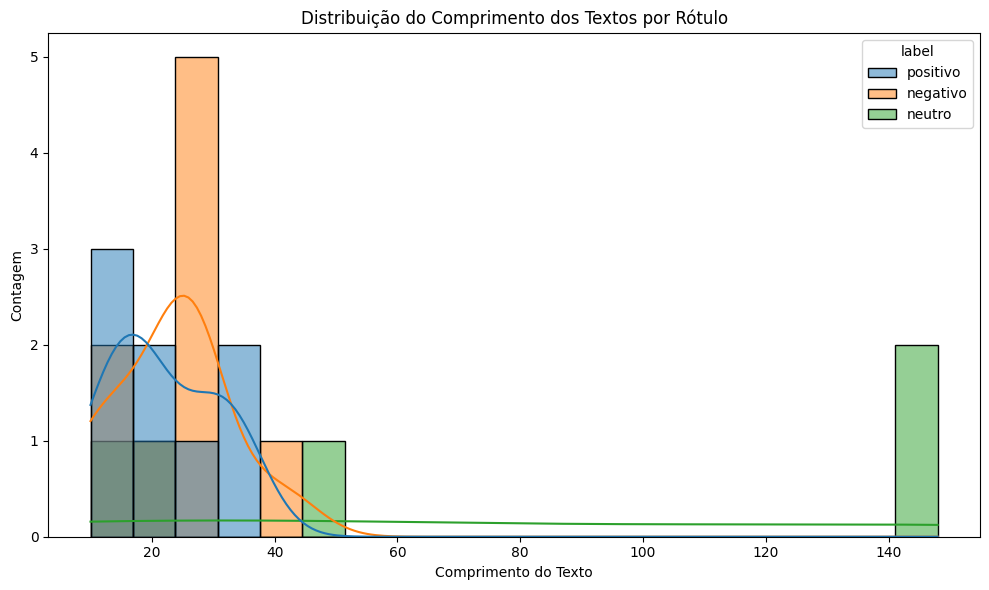

In [29]:
print(df["label"].value_counts())
df["text_lenght"] = df["text"].astype(str).apply(len)
print(df[["label","text_lenght"]].groupby("label").mean())

plt.figure(figsize=(10,6))
sns.histplot(data=df, x="text_lenght", hue="label", bins=20 , kde=True)
plt.title("Distribuição do Comprimento dos Textos por Rótulo")
plt.xlabel("Comprimento do Texto")
plt.ylabel("Contagem")
plt.tight_layout()
plt.show()

Salvar dataset limpo

In [30]:
df.to_csv("../data/tweets_limpo.csv", index=False)
print("Dataset limpo salvo em '../data/tweets_limpo.csv'")

Dataset limpo salvo em '../data/tweets_limpo.csv'
